In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
from sklearn.tree import DecisionTreeClassifier

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
clf = DecisionTreeClassifier(max_depth=8)

In [17]:
cross_val_score(clf, X, y, cv=5).mean()

0.9666666666666668

In [18]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

X = df[['class', 'sex', 'age', 'fare', 'embarked']]
y = df['survived']

In [21]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['age', 'fare']),
    ('categoric', categoric_transformer, ['class', 'sex', 'embarked'])
])

model = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('model', DecisionTreeClassifier())
])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7668161434977578

In [25]:
from sklearn.model_selection import GridSearchCV

In [38]:
gridsearch = GridSearchCV(estimator=model,
                          param_grid={
                              'model__max_depth': [5, 10, 20, 50],
                              'preprocessing__numeric__imputer__strategy': ['mean', 'median']
                          })

In [39]:
gridsearch.fit(X_train, y_train);

In [40]:
from sklearn.base import clone
best_gs_model = clone(gridsearch.best_estimator_)

In [41]:
best_gs_model.fit(X_train, y_train)
accuracy_score(y_test, best_gs_model.predict(X_test))

0.8026905829596412

In [42]:
gridsearch.best_params_

{'model__max_depth': 5, 'preprocessing__numeric__imputer__strategy': 'median'}

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly_f = PolynomialFeatures(degree=2)

In [50]:
X = np.random.random((20, 2))

In [53]:
poly_f.fit_transform(X).shape

(20, 6)

In [55]:
poly_f.get_feature_names(input_features=['x', 'y'])

['1', 'x', 'y', 'x^2', 'x y', 'y^2']

In [56]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [58]:
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [89]:
from sklearn.linear_model import LinearRegression

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['carat', 'depth', 'table']),
    ('categoric', categoric_transformer, ['cut', 'color', 'clarity'])
])

model = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('model', LinearRegression())
])

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

1370537.7510602798

In [92]:
mean_squared_error(y_test, np.ones(y_test.shape) * y_train.mean())

15798744.087809123

In [93]:
from sklearn.linear_model import LinearRegression

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['carat', 'depth', 'table']),
    ('categoric', categoric_transformer, ['cut', 'color', 'clarity'])
])

model = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

In [94]:
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

576564.8674288179

In [101]:
from sklearn.linear_model import Ridge

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['carat', 'depth', 'table']),
    ('categoric', categoric_transformer, ['cut', 'color', 'clarity'])
])

model = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', Ridge())
])

In [103]:
gridsearch = GridSearchCV(estimator=model,
                          param_grid={
                              'model__alpha': [.01, .1, 1., 10., 100.]
                          })

gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table']),
                                                                        ('categoric',
                                                                         Pipeline(ste

In [105]:
best_gs_model = clone(gridsearch.best_estimator_)
best_gs_model.fit(X_train, y_train)
mean_squared_error(y_test, best_gs_model.predict(X_test))

584003.9670970751

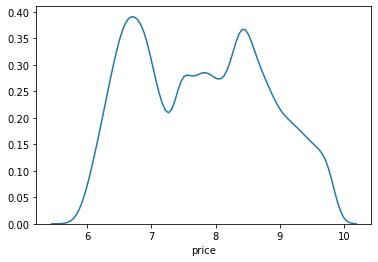

In [107]:
sns.distplot(np.log1p(df['price']), hist=False)
plt.show()

In [110]:
z_train = np.log1p(y_train)
z_test = np.log1p(y_test)

In [111]:
from sklearn.linear_model import LinearRegression

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['carat', 'depth', 'table']),
    ('categoric', categoric_transformer, ['cut', 'color', 'clarity'])
])

model = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

In [112]:
model.fit(X_train, z_train)
z_pred = model.predict(X_test)
y_pred = np.e ** z_pred - 1
mean_squared_error(y_test, y_pred)

801762.334082095

In [113]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [114]:
from sklearn.decomposition import PCA

In [115]:
pca = PCA(n_components=1)
x = pca.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [116]:
pca.explained_variance_ratio_

array([0.92461872])

In [118]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ]])

In [119]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [120]:
kmeans.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

KMeans(n_clusters=3)

In [121]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [122]:
df['species'].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [132]:
df = pd.read_csv('Mall_Customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


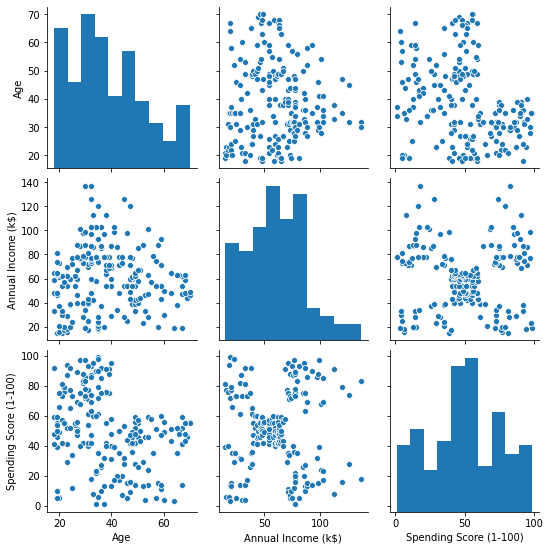

In [133]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [134]:
from sklearn.metrics import silhouette_score

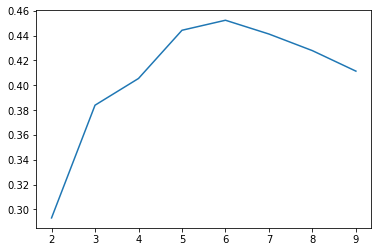

In [135]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scores = []
ks = list(range(2, 10))
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))
    
plt.plot(ks, scores)
plt.show()

In [136]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [138]:
res_df = X.copy()
res_df['cluster'] = kmeans.labels_

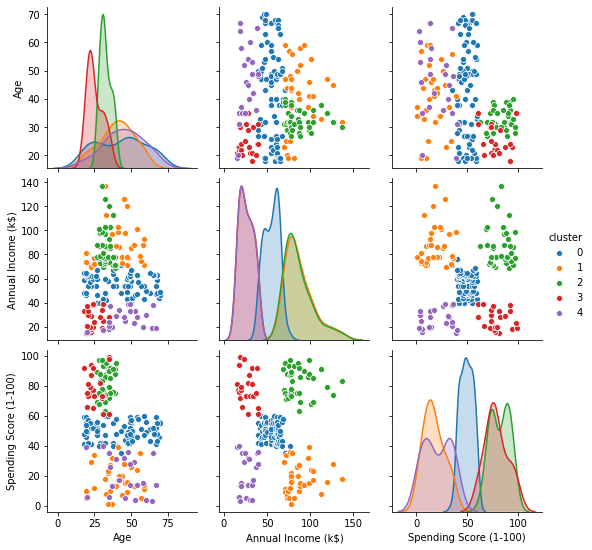

In [139]:
sns.pairplot(data=res_df, hue='cluster')
plt.show()